In [ ]:
import os; os.chdir("..")  # change into root of working directory
import sys; sys.path.append("src")  # add src to system path and allow packages to be found
import pandas as pd
from glob import glob
import itertools as it
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import evaluation.calc as calc
from image.analysis import Data

import meta data

In [ ]:
meta = Data.read_meta("data/pics_classic/meta/*meta.csv").sort_values(["date","id"])
meta

import measurements. Make sure to execute read_measurements.py beforehand to gather all measurement data

In [ ]:
measurements = Data.read_measurements("data/measurements.csv").sort_values(["date","id"])
measurements

join both dataframes

In [ ]:
meta = meta.groupby(["date","id"]).aggregate("first").reset_index() # get only the first entry of all pictures of each id on one day
data = meta.merge(measurements, how="left", on=["date","id"]).query("id != 34") # remove id 34 because it mostly provides wrong values due to continuous measurements
data

## exploration of raw data

look at the times at which pictures and respectively phyicochemical measurements were taken throughout the day

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.hist(np.array(pd.to_datetime(data.time, format="%H%M%S")))

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax.set_xlabel("time of day")
ax.set_ylabel("frequency of measurements/photos")

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

look at the relation between time and physicochemical measurements

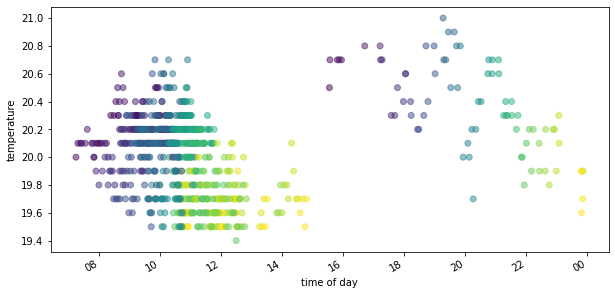

In [284]:
# data 
pdat = data[["id","time","temperature", "date"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
x2 = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))
y = np.array(pdat.temperature)
g = np.array(pdat.id)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x2,y,c=g, alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax.set_xlabel("time of day")
ax.set_ylabel("temperature")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.show()

plot ph

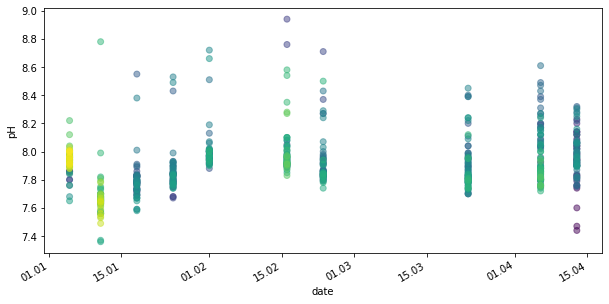

In [276]:
# data 
pdat = data[["date","time","pH"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
y = np.array(pdat.pH)
g = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=g, alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
ax.set_xlabel("date")
ax.set_ylabel("pH")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.show()

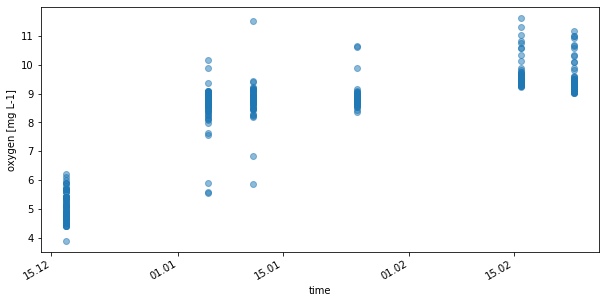

In [272]:
# data 
pdat = data[["date","time","oxygen", "id"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
y = np.array(pdat.oxygen)
g = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))
shelf = np.where(np.array(pdat.id) <= 40, 0, 1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,c="tab:blue", alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
ax.set_xlabel("time")
ax.set_ylabel("oxygen [mg L-1]")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.show()

In [ ]:
pdat = data[["date","time","oxygen", "id"]]
x = np.array(pd.to_datetime(pdat.date, format="%Y-%m-%d"))
y = np.array(pdat.oxygen)
g = np.array(pd.to_datetime(pdat.time, format="%H%M%S"))
shelf = np.where(np.array(pdat.id) <= 40, 0, 1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,c="tab:blue", alpha=.5)

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
ax.set_xlabel("time")
ax.set_ylabel("oxygen [mg L-1]")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.show()

In [184]:
def regression_datetime(df, x_col, y_col, ax=None):
    df = df[[x_col, y_col]].dropna()
    x = np.array(pd.to_datetime(df[x_col], format="%H%M%S")).astype(float)
    y = np.array(df[y_col])
    m, b = np.polyfit(x, y, 1)
    
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
    ax.scatter(pd.to_datetime(x),y)
    ax.plot(pd.to_datetime(x), m*x + b, color="gray", alpha=.5)
    
    if ax is None:
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
        ax.set_xlabel("time of day")
        ax.set_ylabel("temperature")
        fig.autofmt_xdate()


In [231]:
pdat = data[["id","time","pH"]].query("id == 36")
pdat
# regression_datetime(pdat,"time","temperature")



,id,time,pH
35,36,101108,NaN
113,36,125714,NaN
192,36,195543,NaN
270,36,121731,NaN
349,36,123709,NaN
415,36,144725,8.12
478,36,093820,NaN
540,36,140055,7.99
602,36,105557,NaN
666,36,102651,7.91
